In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

In [3]:
directory = os.fsencode("data")

for file in os.listdir("data"):
    filename = os.fsdecode(file)
    path = os.path.join("data", filename)
    df = pd.read_csv(path)

# Weather Dataset

In [4]:
temp = pd.read_csv('data/open-meteo-46.57N8.68E2108m.csv')
temp = temp.fillna(0)
temp.head()

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),shortwave_radiation_sum (MJ/m²)
0,1940-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31115.04,0.00,0.0,0.0,0.00,0,0.0,0.0,0.00
1,1940-01-02,0.0,-14.8,-24.6,-20.1,-19.1,-29.2,-24.8,31170.38,26396.00,0.0,0.0,0.00,0,7.6,27.0,6.78
2,1940-01-03,1.0,-9.9,-18.8,-14.3,-14.4,-24.0,-18.8,31230.27,26186.31,0.0,0.0,0.00,0,6.8,23.0,6.38
3,1940-01-04,71.0,-9.4,-13.4,-11.5,-13.1,-17.2,-15.4,31294.60,14612.94,0.6,0.0,0.42,4,2.3,18.7,4.26
4,1940-01-05,71.0,-7.8,-13.8,-11.4,-12.0,-18.0,-15.5,31363.32,23518.90,0.1,0.0,0.07,1,6.8,25.6,6.15


In [5]:
temp_cols_corr = temp.columns.tolist()
temp_cols_corr.remove('time')

temp_corr_matrix = temp[temp_cols_corr].corr()
print(f"Correlation matrix shape: {temp_corr_matrix.shape}")
temp_corr_matrix.iloc[:16, :16]

Correlation matrix shape: (16, 16)


,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),shortwave_radiation_sum (MJ/m²)
weather_code (wmo code),1.000000,-0.152688,0.054360,-0.050414,-0.142510,0.054520,-0.044317,0.046135,-0.407541,0.400775,0.193689,0.379172,0.713863,0.153783,0.391529,-0.252200
temperature_2m_max (°C),-0.152688,1.000000,0.925422,0.983717,0.997405,0.928551,0.982969,0.727324,0.495812,-0.009893,0.250241,-0.255155,-0.137841,-0.228572,-0.306943,0.596755
temperature_2m_min (°C),0.054360,0.925422,1.000000,0.974079,0.923688,0.998342,0.972132,0.706575,0.305068,0.149719,0.338453,-0.115658,0.101556,-0.167011,-0.164203,0.448464
temperature_2m_mean (°C),-0.050414,0.983717,0.974079,1.000000,0.982525,0.975454,0.998939,0.738116,0.415483,0.069355,0.296247,-0.188074,-0.023488,-0.201405,-0.240345,0.544182
apparent_temperature_max (°C),-0.142510,0.997405,0.923688,0.982525,1.000000,0.927918,0.983827,0.746516,0.503847,-0.004318,0.257691,-0.254408,-0.131789,-0.249353,-0.319064,0.616662
apparent_temperature_min (°C),0.054520,0.928551,0.998342,0.975454,0.927918,1.000000,0.975571,0.708742,0.307308,0.145799,0.343868,-0.126272,0.097485,-0.191292,-0.185054,0.447741
apparent_temperature_mean (°C),-0.044317,0.982969,0.972132,0.998939,0.983827,0.975571,1.000000,0.741457,0.412685,0.072354,0.304425,-0.191645,-0.019729,-0.225570,-0.256729,0.542989
daylight_duration (s),0.046135,0.727324,0.706575,0.738116,0.746516,0.708742,0.741457,1.000000,0.524311,0.063957,0.244998,-0.145674,0.038841,-0.057928,-0.154082,0.807874
sunshine_duration (s),-0.407541,0.495812,0.305068,0.415483,0.503847,0.307308,0.412685,0.524311,1.000000,-0.516998,-0.206998,-0.524781,-0.610930,-0.094036,-0.364571,0.839146
precipitation_sum (mm),0.400775,-0.009893,0.149719,0.069355,-0.004318,0.145799,0.072354,0.063957,-0.516998,1.000000,0.694481,0.731781,0.668511,0.126603,0.472957,-0.308878


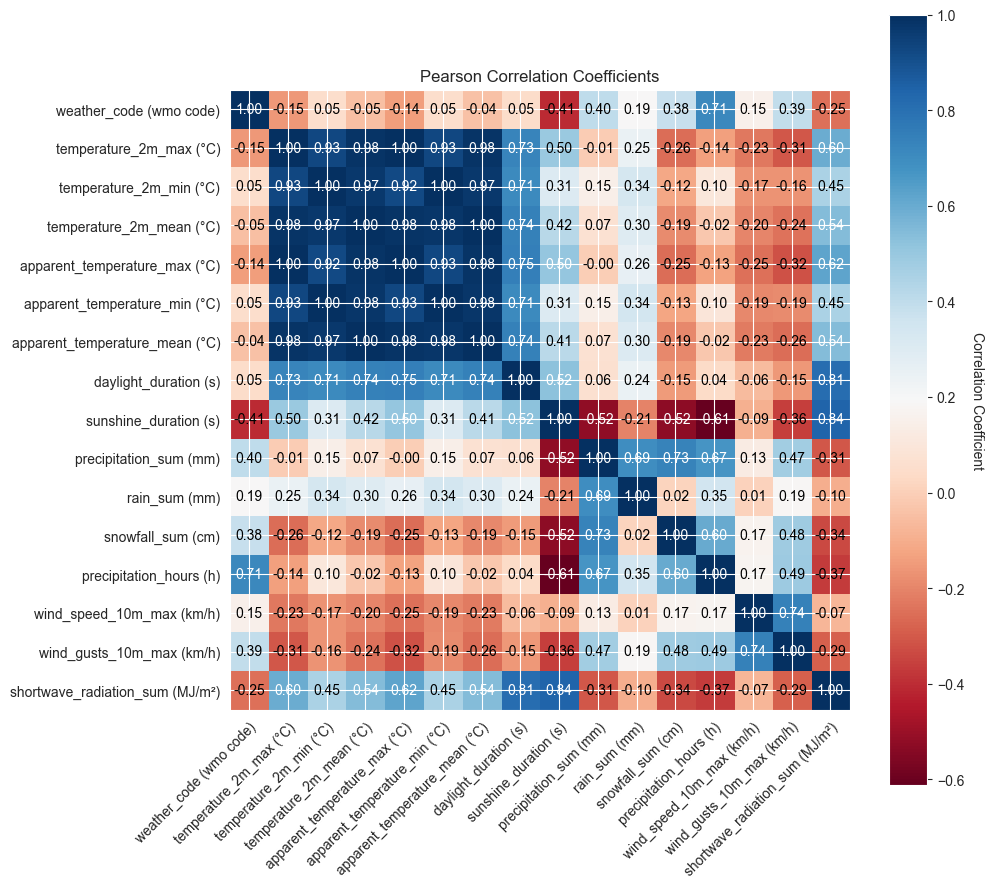

In [6]:
# Create the heat map
tmp = temp_corr_matrix.to_numpy()
fig, ax = plt.subplots()
im = plt.imshow(tmp, cmap = 'RdBu', interpolation='nearest')

# Add labels to rows and columns
cols = temp_corr_matrix.columns
ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)
plt.setp(ax.get_xticklabels(), 
         rotation=45, 
         ha="right",
         rotation_mode="anchor"
         )

# Loop over data dimensions and create text annotations
for i in range(len(cols)):
    for j in range(len(cols)):
        ax.text(j, i, f'{tmp[i, j]:.2f}', ha='center', va='center', color='white' if np.abs(tmp[i, j]) > 0.5 else 'black')

# Add a colour bar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Correlation Coefficient', rotation=-90, va="bottom")
ax.set_title('Pearson Correlation Coefficients')
fig.set_size_inches((10, 10))
plt.show()

# Length Change Dataset

In [7]:
length = pd.read_csv('data/lengthchange.csv')
length = length.replace(to_replace={'quality of start date':'x', 'quality of end date':'x', 'observer':'-'}, value=0).fillna(0)
length = length.iloc[2:]
length.head()

,glacier name,glacier id,start date of observation,quality of start date,end date of observation,quality of end date,length change,elevation of glacier tongue,observer
2,Silvrettagletscher,A10g-05,1956-09-01,0,1957-09-01,0,-8,0,0
3,Silvrettagletscher,A10g-05,1957-09-01,0,1958-09-01,0,-9,0,0
4,Silvrettagletscher,A10g-05,1958-09-01,0,1959-09-01,0,-16,0,0
5,Silvrettagletscher,A10g-05,1959-09-01,0,1960-09-01,0,-3,0,0
6,Silvrettagletscher,A10g-05,1960-09-01,0,1961-09-01,0,-10,0,0


In [8]:
length_cols_corr = length.columns.tolist()
length_cols_corr = [e for e in length_cols_corr if e not in ('glacier name', 'glacier id', 'start date of observation', 'end date of observation', 'observer')]

length_corr_matrix = length[length_cols_corr].corr().fillna(0)
print(f"Correlation matrix shape: {length_corr_matrix.shape}")
length_corr_matrix.iloc[:4,:4]

Correlation matrix shape: (4, 4)


,quality of start date,quality of end date,length change,elevation of glacier tongue
quality of start date,0.0,0.0,0.000000,0.000000
quality of end date,0.0,0.0,0.000000,0.000000
length change,0.0,0.0,1.000000,-0.102813
elevation of glacier tongue,0.0,0.0,-0.102813,1.000000


<Axes: >

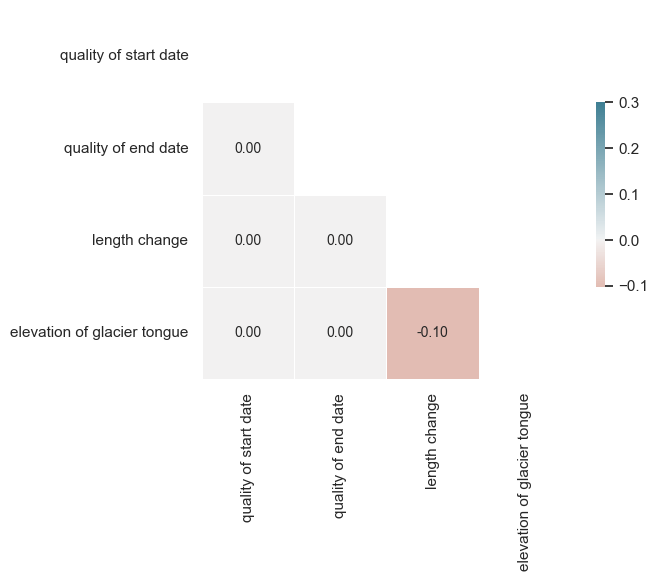

In [9]:
# Create the heat map
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(length_corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20,220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(length_corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"size": 10})

In [11]:
def plot_glacier_length_change(file_path):
    global glacier
    length_data = pd.read_csv(file_path)
    length_data = length_data.fillna(0)
    length_data = length_data.iloc[2:]
    length_data['start date of observation'] = pd.to_datetime(length_data['start date of observation'])
    
    # Convert column to numeric
    length_data['length change'] = pd.to_numeric(length_data['length change'], errors='coerce')
    length_data['elevation of glacier tongue'] = pd.to_numeric(length_data['elevation of glacier tongue'], errors='coerce')
    
    # Find all unique glaciers
    glaciers = length_data['glacier name'].unique()
    number_of_glaciers = len(glaciers)
    
    # Calculate variance of length change for each glacier and sort by variance
    glacier_variance = length_data.groupby('glacier name')['length change'].var().sort_values(ascending=False)
    
    # Create figure
    length_change_fig = go.Figure()

    # Loop through each glacier and add trace to the figure
    for glacier in glacier_variance.index:
        glacier_data = length_data[length_data['glacier name'] == glacier]
        length_change_fig.add_trace(go.Scatter(
            x=glacier_data['start date of observation'], 
            y=glacier_data['length change'],
            mode='lines',
            name=f"{glacier} (Var: {glacier_variance[glacier]:.2f})"
        ))
    
    length_change_fig.update_layout(title='Glacier Length Changes Over Time',
                      xaxis_title='Date',
                      yaxis_title='Length Change (m)',
                      legend_title="Glacier",
                      template='plotly_white')
    
    length_change_fig.show()

plot_glacier_length_change('data/lengthchange.csv')

# Mass Balance Dataset

In [12]:
mass = pd.read_csv('data/massbalance_fixdate.csv')
mass = mass.fillna(0)
mass = mass.iloc[2:]
mass.head()

,glacier name,glacier id,start date of observation,end date of winter observation,end date of observation,winter mass balance,summer mass balance,annual mass balance,equilibrium line altitude,accumulation area ratio,glacier area,minimum elevation of glacier,maximum elevation of glacier,observer
2,Silvrettagletscher,A10g-05,1914-10-01,1915-04-30,1915-09-30,1503,-1918,-415,2795,45,4.06687,2406,3185,VAW / ETH Zuerich
3,Silvrettagletscher,A10g-05,1915-10-01,1916-04-30,1916-09-30,1415,-1034,381,2645,75,3.55563,2414,3091,VAW / ETH Zuerich
4,Silvrettagletscher,A10g-05,1916-10-01,1917-04-30,1917-09-30,1872,-1900,-28,2735,60,3.55563,2414,3091,VAW / ETH Zuerich
5,Silvrettagletscher,A10g-05,1917-10-01,1918-04-30,1918-09-30,1075,-1489,-414,2795,42,3.55563,2414,3091,VAW / ETH Zuerich
6,Silvrettagletscher,A10g-05,1918-10-01,1919-04-30,1919-09-30,1862,-840,1022,2465,98,3.55563,2414,3091,VAW / ETH Zuerich


In [14]:
mass_cols_corr = mass.columns.tolist()
mass_cols_corr = [e for e in mass_cols_corr if e not in (
'glacier name', 'glacier id', 'start date of observation', 'end date of winter observation', 'end date of observation', 'observer')]

mass_corr_matrix = mass[mass_cols_corr].corr().fillna(0)
print(f"Correlation matrix shape: {mass_corr_matrix.shape}")
mass_corr_matrix.iloc[:8, :8]

Correlation matrix shape: (8, 8)


,winter mass balance,summer mass balance,annual mass balance,equilibrium line altitude,accumulation area ratio,glacier area,minimum elevation of glacier,maximum elevation of glacier
winter mass balance,1.000000,-0.209592,0.315812,-0.509258,0.200287,-0.168977,0.027077,-0.423795
summer mass balance,-0.209592,1.000000,0.861556,-0.262809,0.775936,0.117155,-0.143486,0.312943
annual mass balance,0.315812,0.861556,1.000000,-0.519427,0.856936,0.025952,-0.125177,0.083640
equilibrium line altitude,-0.509258,-0.262809,-0.519427,1.000000,-0.456241,-0.007828,0.244306,0.598868
accumulation area ratio,0.200287,0.775936,0.856936,-0.456241,1.000000,0.260869,-0.345561,0.285446
glacier area,-0.168977,0.117155,0.025952,-0.007828,0.260869,1.000000,-0.858541,0.512285
minimum elevation of glacier,0.027077,-0.143486,-0.125177,0.244306,-0.345561,-0.858541,1.000000,-0.344115
maximum elevation of glacier,-0.423795,0.312943,0.083640,0.598868,0.285446,0.512285,-0.344115,1.000000


<Axes: >

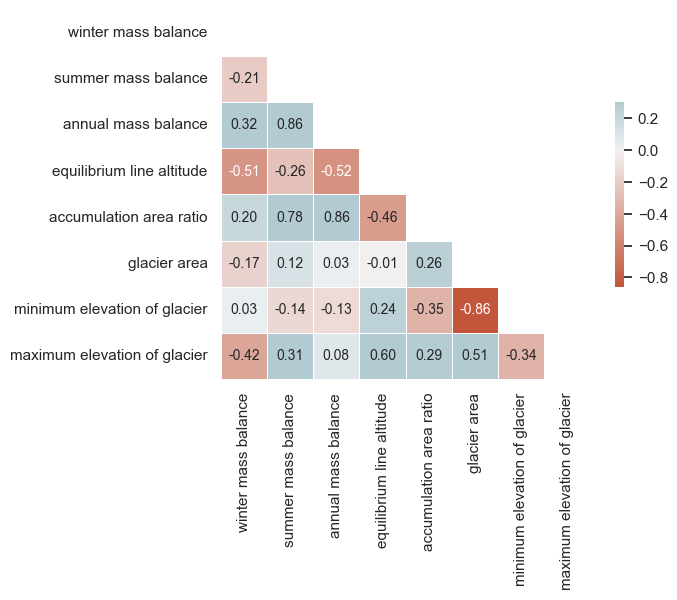

In [15]:
# Create the heat map
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(mass_corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(mass_corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"size": 10})

# Elevation Bins Dataset

In [16]:
elevation = pd.read_csv(('data/massbalance_fixdate_elevationbins.csv'))
elevation = elevation.fillna(0)
elevation = elevation.iloc[2:]
elevation.head()

,glacier name,glacier id,start date of observation,end date of winter observation,end date of observation,winter mass balance,summer mass balance,annual mass balance,area of elevation bin,lower elevation of bin,upper elevation of bin,observer
2,Silvrettagletscher,A10g-05,1914-10-01,1915-04-30,1915-09-30,1334,-4516,-3182,0.16813,2400,2500,VAW / ETH Zuerich
3,Silvrettagletscher,A10g-05,1914-10-01,1915-04-30,1915-09-30,1435,-3612,-2177,0.41,2500,2600,VAW / ETH Zuerich
4,Silvrettagletscher,A10g-05,1914-10-01,1915-04-30,1915-09-30,1568,-2477,-909,0.9025,2600,2700,VAW / ETH Zuerich
5,Silvrettagletscher,A10g-05,1914-10-01,1915-04-30,1915-09-30,1567,-1750,-183,0.8925,2700,2800,VAW / ETH Zuerich
6,Silvrettagletscher,A10g-05,1914-10-01,1915-04-30,1915-09-30,1580,-1324,256,0.725,2800,2900,VAW / ETH Zuerich


In [17]:
elevation_cols_corr = elevation.columns.tolist()
elevation_cols_corr = [e for e in elevation_cols_corr if e not in (
    'glacier name', 'glacier id', 'start date of observation', 'end date of winter observation',
    'end date of observation', 'observer')]

elevation_corr_matrix = elevation[elevation_cols_corr].corr().fillna(0)
print(f"Correlation matrix shape: {elevation_corr_matrix.shape}")
elevation_corr_matrix.iloc[:6, :6]

Correlation matrix shape: (6, 6)


,winter mass balance,summer mass balance,annual mass balance,area of elevation bin,lower elevation of bin,upper elevation of bin
winter mass balance,1.000000,0.367326,0.496980,0.142484,0.313334,0.308220
summer mass balance,0.367326,1.000000,0.989652,0.134650,0.584008,0.581975
annual mass balance,0.496980,0.989652,1.000000,0.147607,0.593209,0.590523
area of elevation bin,0.142484,0.134650,0.147607,1.000000,0.062058,0.066384
lower elevation of bin,0.313334,0.584008,0.593209,0.062058,1.000000,0.999686
upper elevation of bin,0.308220,0.581975,0.590523,0.066384,0.999686,1.000000


<Axes: >

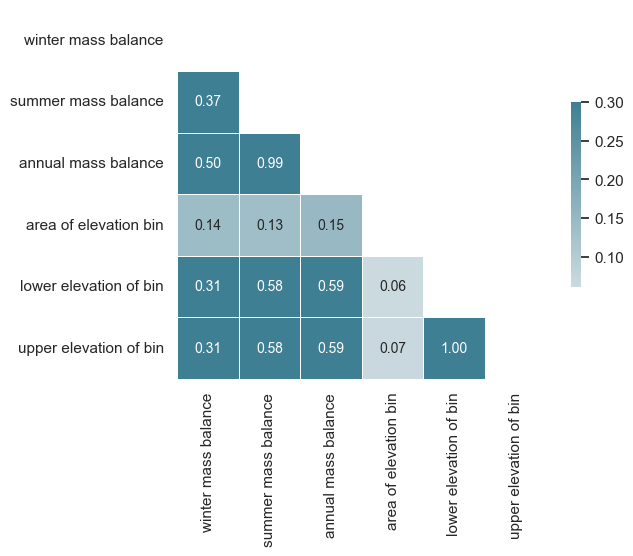

In [18]:
# Create the heat map
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(elevation_corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(elevation_corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"size": 10})